# Pymaceuticals Inc.
---

### Analysis

- The treatment with the largest number of mice was capomulin.The correlation between the mouse weight and average tumor volume was strong at 0.84.
The study was a good sample as the mice were evenly split between male and female as shown by the pie charts. 
Based on the statistics both campomulin and ramicane look to be better options compared to infubinol or ceftamin. 

 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice_id = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
#duplicate_mice_id

duplicate_mice_id = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mice_clean = clean_df["Mouse ID"].nunique()
mice_clean

248

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFram
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":standard_deviation, 
                           "Tumor Volume Std. Err.":sem})


# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])

Summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

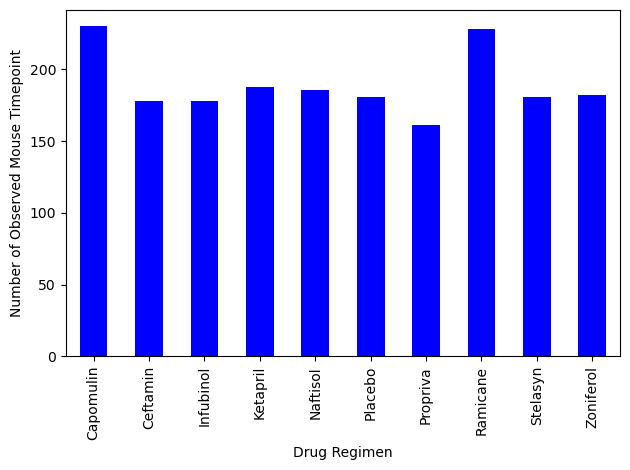

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [156]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count_per_drug = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


pandas_plot = mice_count_per_drug.plot.bar(color="b",fontsize = 10)

#plot axis labels
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Observed Mouse Timepoint",fontsize = 10)

#plot chart and format

plt.tight_layout()
plt.show()

mice_count_per_drug

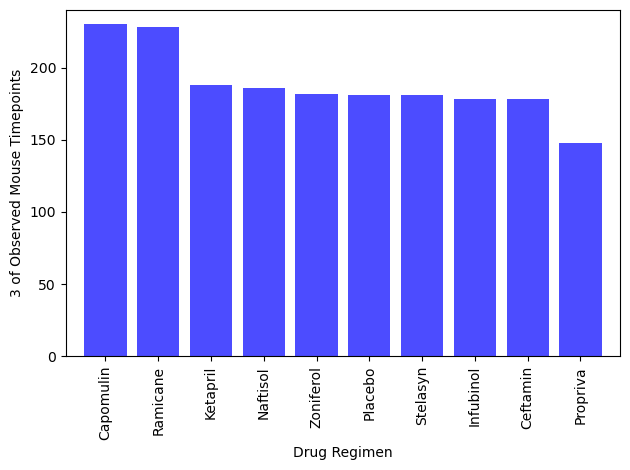

In [179]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

x_axis = mice_count.index.values
y_axis = mice_count.values


plt.bar(x_axis, y_axis, color="blue", alpha=0.7, align="center")

# plot axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("3 of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

#plot axis size
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)

#plot and format
plt.tight_layout()
plt.show()

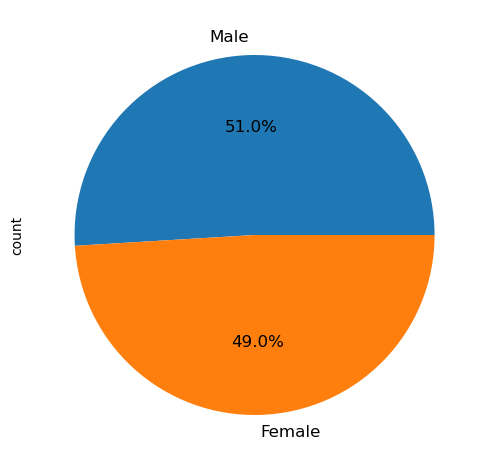

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()

gender_data.plot(kind="pie", y = "Sex", autopct= "%1.1f%%", fontsize=12)

#plot and format
plt.tight_layout()
plt.show()

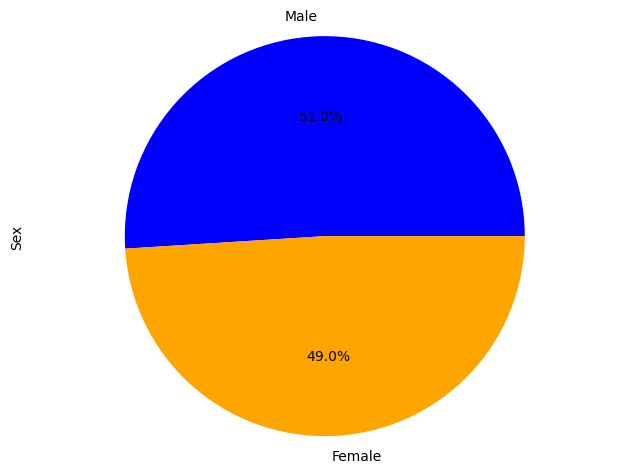

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ["Male", "Female"]
sizes = [51, 49]
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")

#plot axis
plt.ylabel("Sex")
plt.axis("equal")

#plot and format
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df =pd.DataFrame(last_timepoint)
last_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, combined_df, on = ["Mouse ID", "Timepoint"])

final_tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [174]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

for i in range (len(final_tumor_volume_df)-1):
    if final_tumor_volume_df.loc[i,"Drug Regimen"]== "Capomulin":
        tumor_capomulin.append(final_tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if final_tumor_volume_df.loc[i,"Drug Regimen"]== "Ramicane":
        tumor_ramicane.append(final_tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if final_tumor_volume_df.loc[i,"Drug Regimen"]== "Infubinol":
        tumor_infubinol.append(final_tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if final_tumor_volume_df.loc[i,"Drug Regimen"]== "Ceftamin":
        tumor_ceftamin.append(final_tumor_volume_df.loc[i, "Tumor Volume (mm3)"]) 
        
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = [tumor_capomulin, tumor_ramicane,tumor_infubinol,tumor_ceftamin]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_volume[i]).quantile([0.25,0.5,0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile-lowerquartile
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile is: {lowerquartile}.")
    print(f"The upper quartile is: {upperquartile}.")
    print(f"The interquartile range is: {iqr}.")
    print(f"The median is: {quartiles[0.5]}.")
    lower_bound = lowerquartile - (1.5*iqr)
    upper_bound = upperquartile + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for j in range(len(tumor_volume[i])):
        if (tumor_volume[i][j] < lower_bound) or (tumor_volume[i][j] > upper_bound):
            outlier = tumor_volume[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")


Capomulin:
The lower quartile is: 32.37735684.
The upper quartile is: 40.1592203.
The interquartile range is: 7.781863460000004.
The median is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile is: 31.56046955.
The upper quartile is: 40.65900627.
The interquartile range is: 9.098536719999998.
The median is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile is: 54.04860769.
The upper quartile is: 65.52574285.
The interquartile range is: 11.477135160000003.
The median is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile is: 48.72207785.
The upper quartile is: 64.29983003.
The interquartile range is: 15.577752179999997.
The median is: 59.85195552.
Values below 25.355449580000002 could be outliers.
Values above 87.6664582999

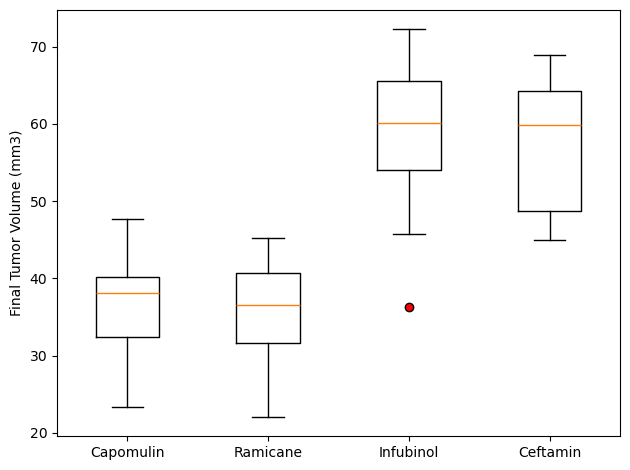

In [175]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

box_plot = dict(markerfacecolor = "r", marker = "o")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume, flierprops = box_plot)
ax1.set_xticklabels(drugs)

#plot and format
plt.tight_layout()
plt.show()

## Line and Scatter Plots

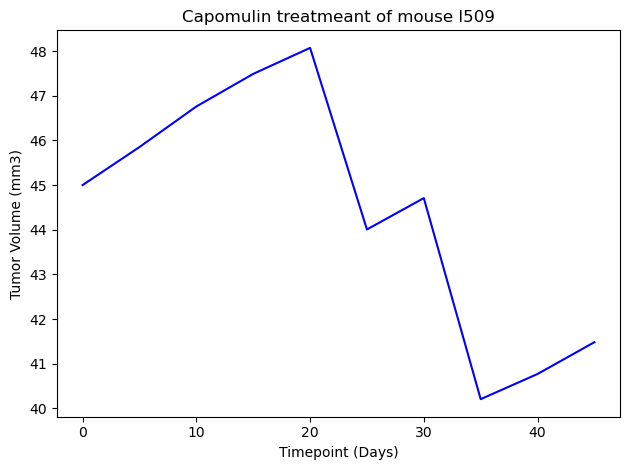

In [176]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


single_mouse = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
single_mouse.head()

fig1, ax1 = plt.subplots()

plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], color="blue") 

# axis labels & titles
plt.title("Capomulin treatmeant of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


#plot and format
plt.tight_layout()
plt.show()



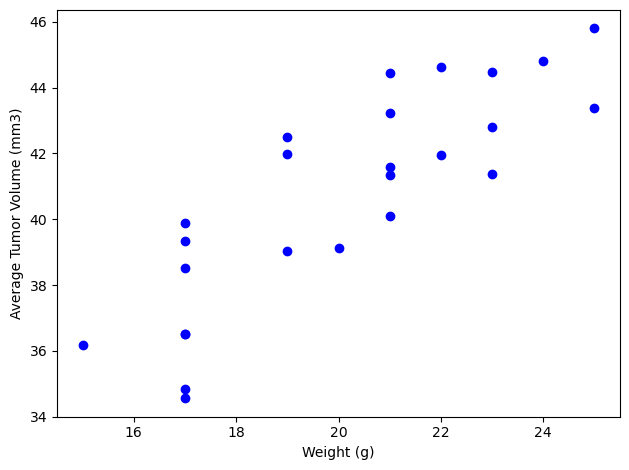

In [177]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")

average_tumor = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique ()

plt.scatter(mouse_weight, average_tumor, color="blue")

#axis labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plot and format
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


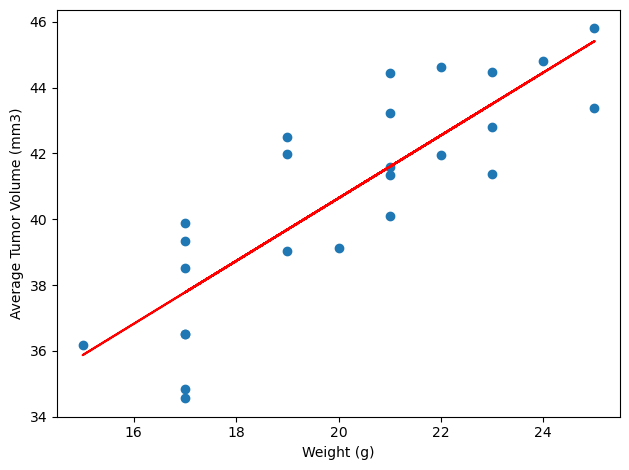

In [178]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, average_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, average_tumor)
plt.plot(mouse_weight,regress_values,"r-")

#axis labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#print out statement 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")

#plot and format
plt.tight_layout()
plt.show()